In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
fp = "/content/drive/MyDrive/Summer2025Research/SolverRepo/results/"
gemini_results = pd.read_csv(fp+'gemini_evaluation.csv', index_col='Unnamed: 0')
gpt_results = pd.read_csv(fp+'gpt_evaluation.csv', index_col='Unnamed: 0')
claude_results = pd.read_csv(fp+'claude_evaluation.csv', index_col='Unnamed: 0')
qwen_results = pd.read_csv(fp+'qwen_evaluation.csv', index_col='Unnamed: 0')
ns_results = pd.read_csv(fp+'neurosymbolic_solver.csv', index_col='Unnamed: 0')

In [40]:
gpt_results

,accuracy (%),avg_time (s)
3,8,3.824548
4,0,2.551210
5,0,0.000000
6,0,0.000000
7,0,0.000000


In [21]:
ns_results = ns_results.rename(columns={'accuracy': 'accuracy (%)'})
ns_results = ns_results.rename(columns={'avg_time': 'avg_time (s)'})

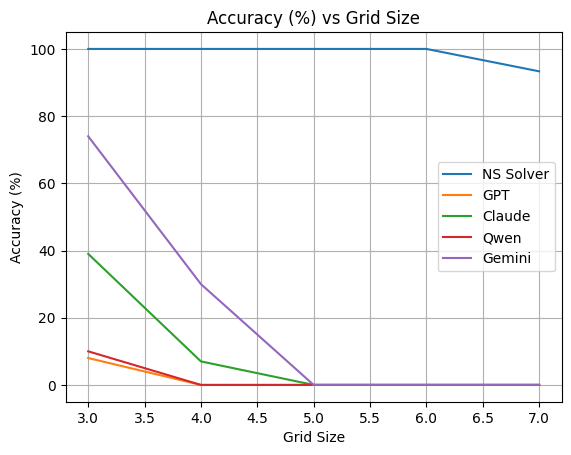

In [34]:
x = gemini_results.index

plt.plot(x, ns_results['accuracy (%)'], label='NS Solver')
plt.plot(x, gpt_results['accuracy (%)'], label='GPT')
plt.plot(x, claude_results['accuracy (%)'], label='Claude')
plt.plot(x, qwen_results['accuracy (%)'], label='Qwen')
plt.plot(x, gemini_results['accuracy (%)'], label='Gemini')


plt.xlabel('Grid Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy (%) vs Grid Size')
plt.legend()
plt.grid(True)

plt.show()

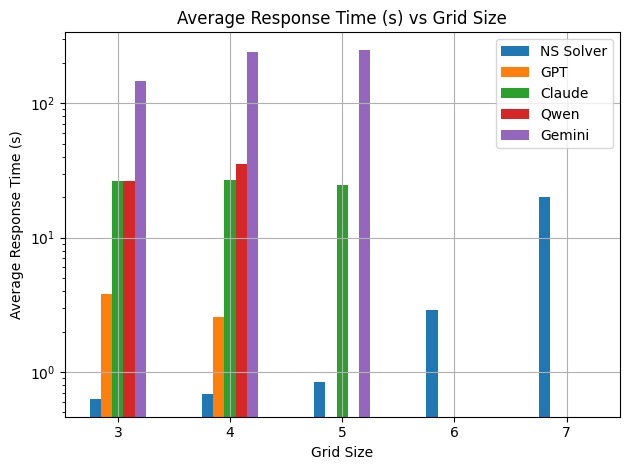

In [36]:
datasets = [ns_results, gpt_results, claude_results, qwen_results, gemini_results]
labels = ['NS Solver', 'GPT', 'Claude', 'Qwen', 'Gemini']

num_datasets = len(datasets)
bar_width = 0.10

x = np.array(gemini_results.index)


for i, (df, label) in enumerate(zip(datasets, labels)):
    x_offset = x + i * bar_width
    plt.bar(x_offset, df['avg_time (s)'], width=bar_width, label=label)

group_centers = x + (num_datasets / 2 - 0.5) * bar_width
plt.xticks(group_centers, x)

plt.yscale('log')
plt.xlabel('Grid Size')
plt.ylabel('Average Response Time (s)')
plt.title('Average Response Time (s) vs Grid Size')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()